## Import libraries

In [3]:
import vco
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
%matplotlib inline

## Create VCO matrix

In [4]:
numrow, numcol = 6, 12
ringsize = 12
minrho = 0.14
rotation_angle = 0
rhos = minrho * (np.sqrt(3)**(np.arange(numrow)))
thetas = np.pi + rotation_angle + 2*np.pi*(np.arange(numcol))/numcol
phz_noise = 0

VCOmat = [[vco.VCO_model(ringsize, rhos[i], thetas[j], phz_noise) \
           for j in range(numcol)] for i in range(numrow)]

## Create many grid cells:
 For each row, all column combos, all cell combos: 6 rows x 4 column combos (12/3) x 12^3 cell combos (~41k grid cells)

In [5]:
full_matrix = np.full([6,12,2*4*12**3], np.nan)
jdx = 0
for row in range(4,6):
    for firstcol in range(4):
        for cell1 in range(12):
            for cell2 in range(12):
                for cell3 in range(12):
                    full_matrix[row,firstcol,  jdx] = cell1
                    full_matrix[row,firstcol+4,jdx] = cell2
                    full_matrix[row,firstcol+8,jdx] = cell3
                    jdx = jdx + 1

## 100 random projections of num_gc grid cells to create potential place cells


In [7]:
num_gc = 5
size   = 5
num_pc = 25

pc_wts = np.zeros([6,12,num_gc,num_pc])
pc_outputs = np.zeros([size*10,size*10,num_pc])
gc_outputs = np.zeros([size*10,size*10,num_gc,num_pc])
for pc in range(num_pc):
    rd_idx = nprd.randint(0,full_matrix.shape[2],size=num_gc)
    pc_wts[:,:,:,pc] = full_matrix[:,:,rd_idx]

    for gc in range(num_gc):
        gc_norm, gc_env = vco.theta_to_grid(VCOmat, pc_wts[:,:,gc,pc], size)
        gc_outputs[:,:,gc,pc] = gc_env
    pc_outputs[:,:,pc] = np.sum(gc_outputs[:,:,:,pc],axis=2)

## plot

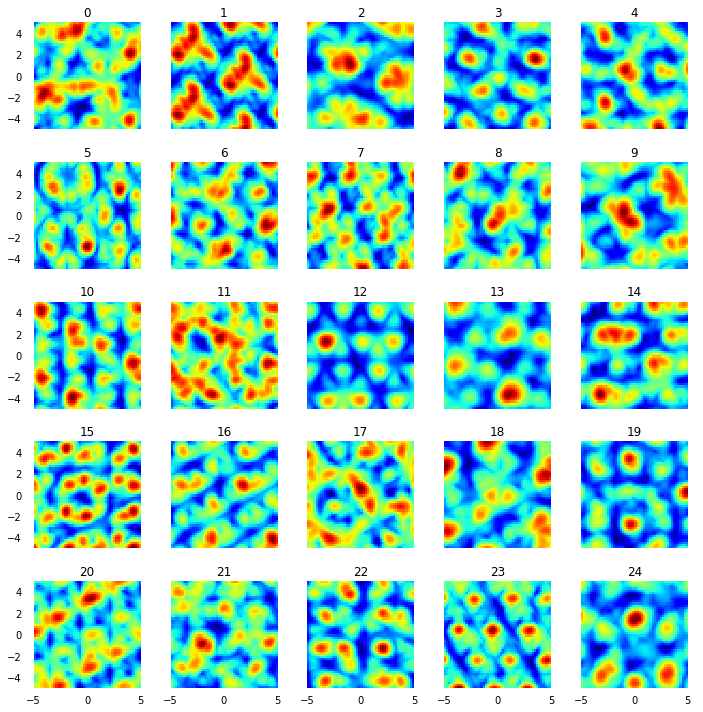

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(25):
    ax = axes_list.pop(0)
    ax.imshow(pc_outputs[:,:,idx],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

## Normalize based on same idea as Welday

In [12]:
threshold = 0.8
pc_outputs_norm = np.zeros_like(pc_outputs)
for pc in range(num_pc):
    max_env = np.max(pc_outputs[:,:,pc])
    thr_env = pc_outputs[:,:,pc] - threshold*max_env
    thr_env[thr_env<0] = 0
    max_env = np.max(thr_env)
    pc_outputs_norm[:,:,pc] = thr_env / max_env

## Plot normalized

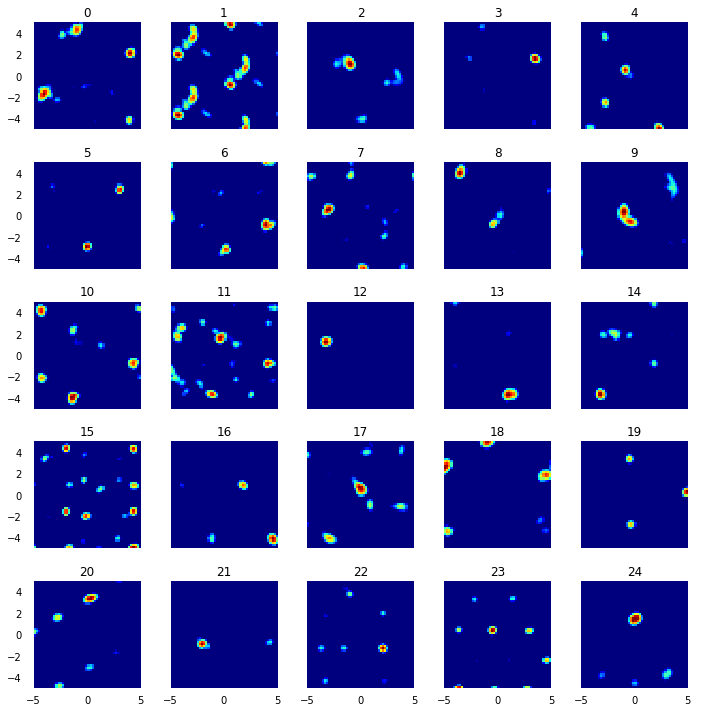

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(25):
    ax = axes_list.pop(0)
    ax.imshow(pc_outputs_norm[:,:,idx],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

## Checking grid cell inputs of good putative place cells

IndexError: index 5 is out of bounds for axis 2 with size 5

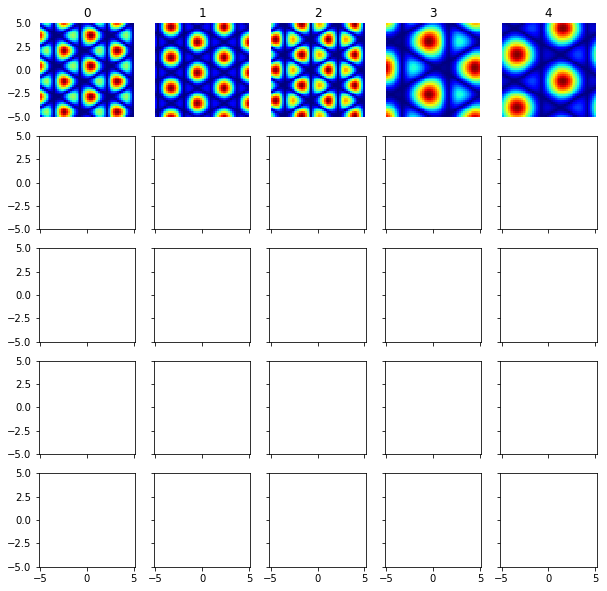

In [15]:
putative_pc = 20


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(25):
    ax = axes_list.pop(0)
    ax.imshow(gc_outputs[:,:,idx,putative_pc],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

## Checking grid cell inputs of BAD putative place cells

In [ ]:
putative_pc = 71


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist]

for idx in range(20):
    ax = axes_list.pop(0)
    ax.imshow(gc_outputs[:,:,idx,putative_pc],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()